# Note: For every question under every exercise, create a markdown cell and name it "Question 1", "Question 2", ...

# PCA from scratch then using scikit learn's PCA

Suppose you have the following dataset:

|Height |Weight|Age  |Salary | 
|:---:|:---:|:---:|:-----:|
|170|70|30|90000|
|175|75|35|55000|
|180|80|40|60000|
|160|60|25|45000
|165|65|28|48000|

1) Build the dataset

2) Describe the dataset by plotting its correlation matrix

3) Apply PCA from scratch:
    - Standardize the data
    - Calculate the covariance matrix
    - Calculate the eigenvalues of the covariance matrix
    - Calculate the eigenvectors of the covariance matrix (make sure they are in unit length)
    - Sort the eigenvectors based on their corresponding eigenvalues in descending order
    - Select the top 2 eigenvectors to form the transformation matrix and get the principal components
    
4) Apply PCA using scikit-learn's library

5) Verify that the top two eigenvectors of the PCA from scratch and scikit's learn PCA are equivalent (take the absolute value)

6) Plot the scree plot of the principal components

In [1]:
import pandas as pd

df = pd.DataFrame({
    'Height': [170, 175, 180, 160, 165],
    'Weight': [70, 75, 80, 60, 65],
    'Age' : [30,35,40,25,28],
    'Salary' : [90000,55000,60000,45000,48000]
})

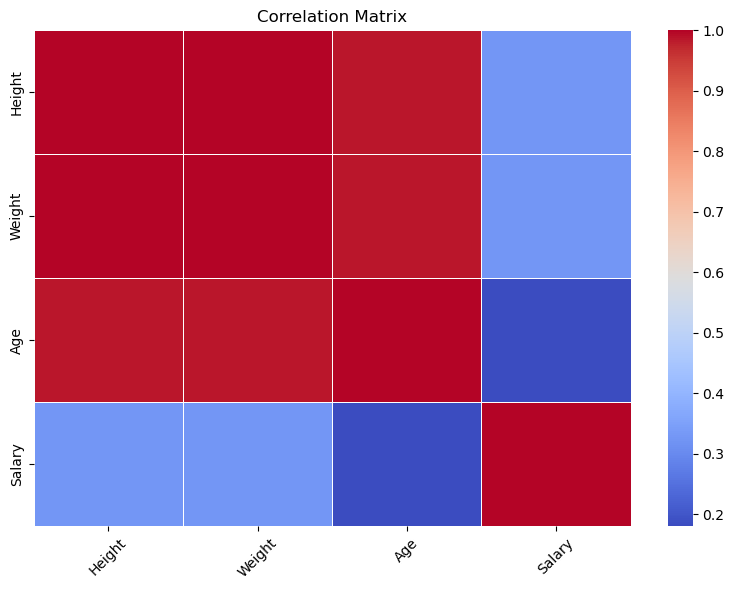

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(),
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 12, "color": "black"},
    linewidths=0.5,
    linecolor='white'
)
plt.xticks(rotation=45)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

cov_matrix = np.cov(X_scaled, rowvar = False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_idx = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[sorted_idx]
eigenvalues = eigenvectors[:, sorted_idx]

top2_eigenvectors = eigenvectors[:, :2]

X_pca = X_scaled.dot(top2_eigenvectors)

X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])

print(X_pca)

        PC1       PC2
0  0.257472 -1.896710
1  1.091989  0.534945
2  2.484626  0.563337
3 -2.495222  0.368830
4 -1.338865  0.429598


In [4]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

components_sklearn = pca.components_

top2_scratch = np.abs(eigenvectors[:, :2])     
top2_sklearn = np.abs(components_sklearn[:2, :].T) 


print("From scratch:\n", top2_scratch)
print("From sklearn:\n", top2_sklearn)

From scratch:
 [[0.56705456 0.07731006]
 [0.56705456 0.07731006]
 [0.55366463 0.2332547 ]
 [0.22439636 0.96624974]]
From sklearn:
 [[0.56705456 0.07731006]
 [0.56705456 0.07731006]
 [0.55366463 0.2332547 ]
 [0.22439636 0.96624974]]


Les deux résultats sont bien identiques

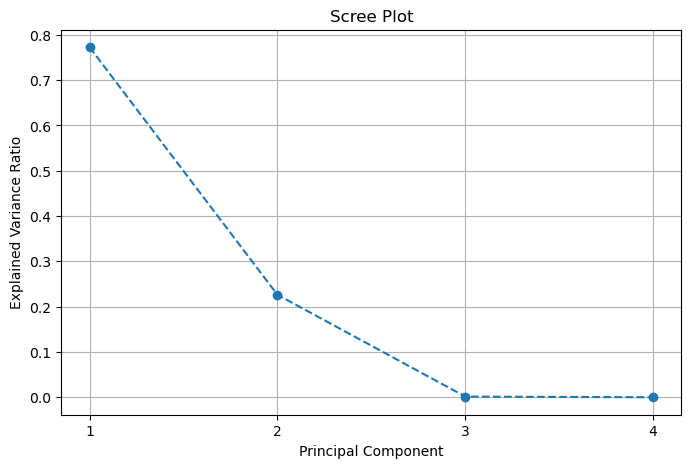

In [5]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.show()

# t-SNE 

We will work with a sample from the digits dataset "MNIST" dataset. MNIST is considered one of the "hello world" datasets in the machine learning commumity. It has a set of 70,000 small images of digits of 28x28 pixels, from zero to nine. From these 70,000 small images, there are 60,000 for training and 10,000 for testing. These digits were handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents:

<img src="MnistExamples.png">


1) Load the data from `keras.datasets` and use only the __testing__ images:
```python
from keras.datasets import mnist
(_,_), (X, y) = mnist.load_data()
```
2) Covert the 28x28 2D matrix into a 1D array (i.e., flatten the 2D matrix to a 1x784 array)

3) Prepare a code in which you input which row you want, and the output will be the image itself with a 28x28 shape and its label

4) Print the first 10 images

5) Apply t-SNE on the dataset and visualize in 2D plot the observations. Show each digit with a different color.

6) Investigate the `perplexity` parameter by setting it to 1, 100, and 1000. What is the effect on the embedded data?

7) Investigate the `early_exaggeration` parameter by setting it to 1, 100, and 1000. What is the effect on the embedded data?

8) Apply PCA using scikit learn and compare the results with that of question 5. Which model is better and why?

In [6]:
from keras.datasets import mnist

(_, _), (X, y) = mnist.load_data()


In [7]:
X_flat = X.reshape(X.shape[0], -1)

In [8]:
import matplotlib.pyplot as plt

def show_image(idx) : 
    plt.imshow(X[idx], cmap = 'gray')
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')
    plt.show()

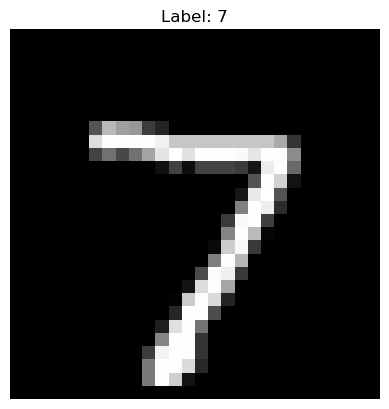

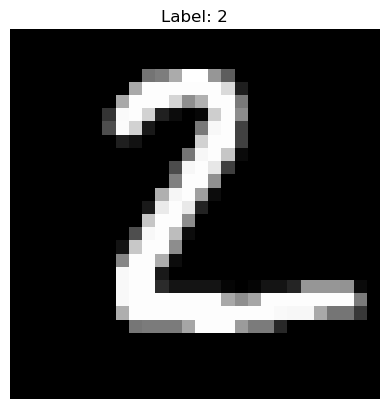

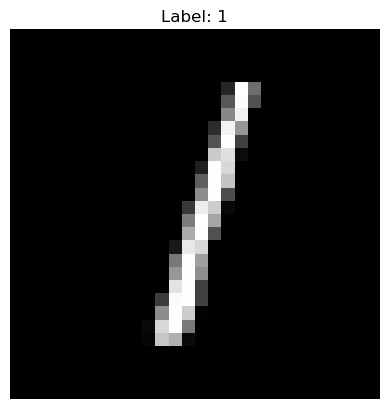

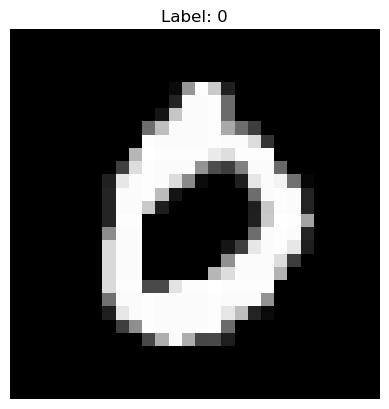

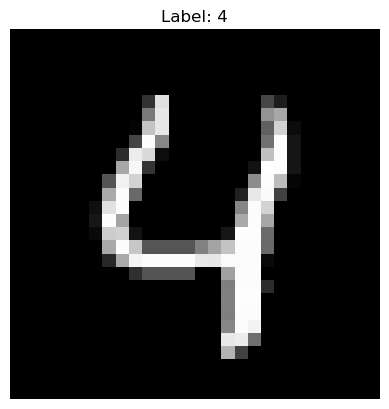

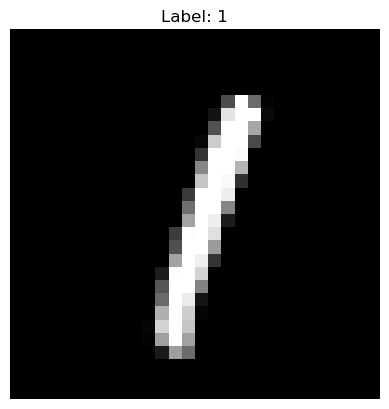

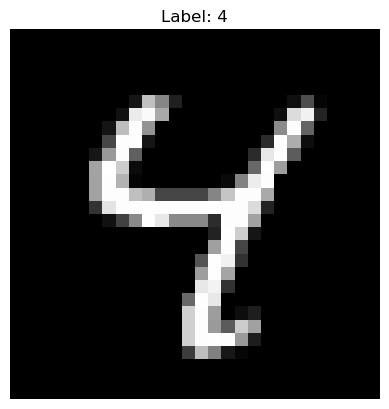

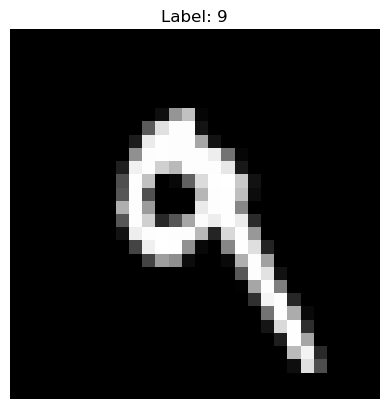

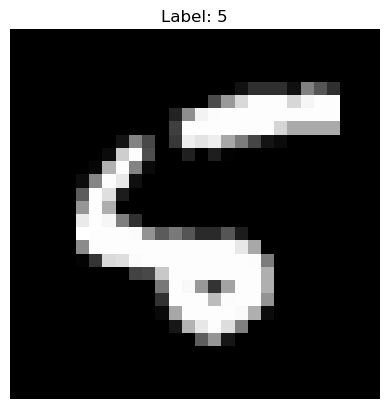

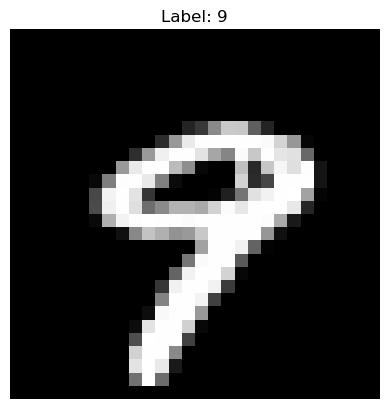

In [9]:
for i in range(10): 
    show_image(i)

KL divergence: 1.9138


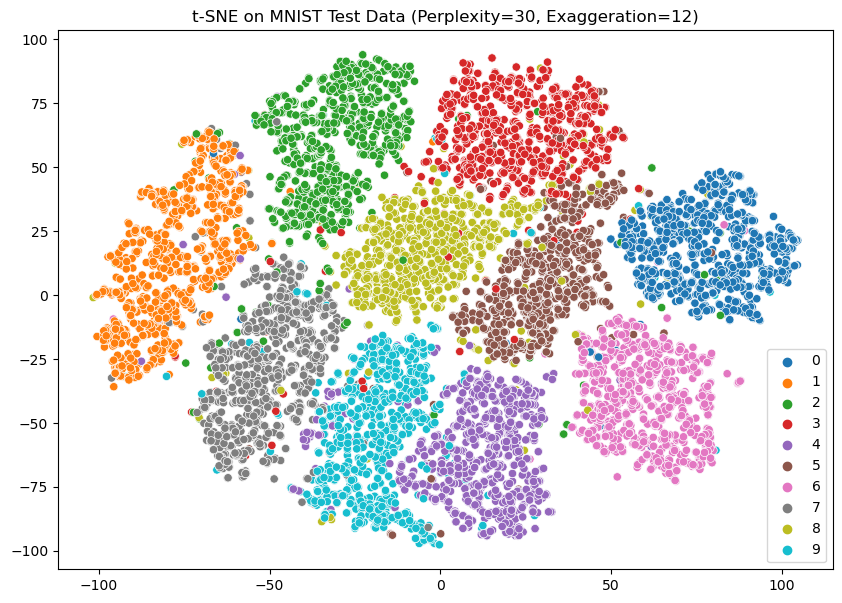

In [10]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


tsne1 = TSNE(
    n_components=2,
    perplexity=10,             
    early_exaggeration=12.0,  
    learning_rate=200,          
    random_state=42
)


X_tsne1 = tsne1.fit_transform(X_flat)

print(f"KL divergence: {tsne1.kl_divergence_:.4f}")


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne1[:, 0], y=X_tsne1[:, 1], hue=y, palette='tab10', legend='full')
plt.title("t-SNE on MNIST Test Data (Perplexity=30, Exaggeration=12)")
plt.show()


KL divergence: 1.7773


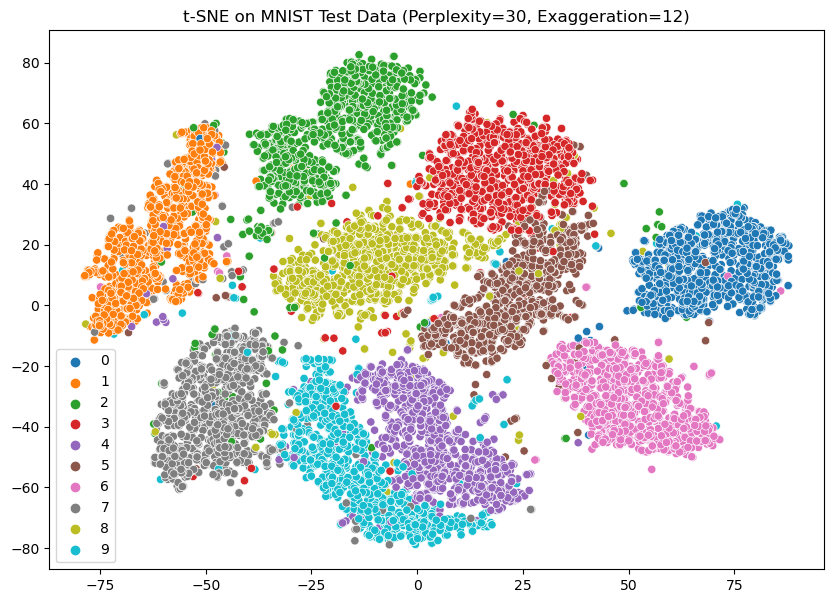

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


tsne2 = TSNE(
    n_components=2,
    perplexity=30,             
    early_exaggeration=12.0,  
    learning_rate=200,          
    random_state=42
)


X_tsne2 = tsne2.fit_transform(X_flat)

print(f"KL divergence: {tsne2.kl_divergence_:.4f}")


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne2[:, 0], y=X_tsne2[:, 1], hue=y, palette='tab10', legend='full')
plt.title("t-SNE on MNIST Test Data (Perplexity=30, Exaggeration=12)")
plt.show()


# Isolation Forest

1) Generate a dataset with random data points using the `make_blobs()` function from `sklearn.datasets` using the following parameters and plot it:
```python
data, _ = make_blobs(n_samples=500, centers=1, cluster_std=2, center_box=(0, 0))
```

2) Just by looking at the data, we see that some points are far away from the core. We will consider that 3% of the points are outliers by setting the variable `contamination = 0.03`. Initialize an isolation forest instance by calling the `IsolationForest(contamination = 0.03, random_state=42)` class. Then, fit the `data` variable using `.fit` and predict the labels of the `data`.

3) Check how many from the contaminated (i.e., outlier) points have been identified. Remember that `.predit` yields `-1` for outliers and `1` for inliers. 

4) Plot the data and the points in the data identified as anomalous in a different color. Hint: the points that should be identified are the points on the periphery of the figure.

5) Call `decision_function()` of the `IsolationForest()` class to calculate the anomaly score of each data points. This way we can understand which data points are the outliers. Note⚠️: In sklearn’s implementation, the anomaly scores are the opposite of the anomaly score defined in the original paper. The lower, the more abnormal. Negative scores represent outliers, positive scores represent inliers.

6) Highlight the top 5 anomalous points in the scatter plot by plotting them in a different color with respect to the whole dataset

We then fit and predict the entire data set. It returns an array consisting of [-1 or 1] where -1 stands for anomaly and 1 stands for normal instance.

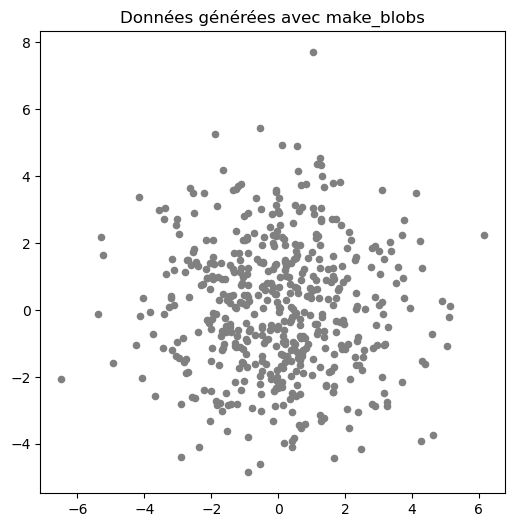

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Génération d’un dataset simple
data, _ = make_blobs(n_samples=500, centers=1, cluster_std=2, center_box=(0, 0), random_state=42)

# Visualisation
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c='gray', s=20)
plt.title("Données générées avec make_blobs")
plt.show()


In [13]:
from sklearn.ensemble import IsolationForest

contamination = 0.03
model = IsolationForest(contamination=contamination, random_state=42)
model.fit(data)

labels = model.predict(data)


In [14]:
import numpy as np

n_outliers = np.sum(labels == -1)
n_inliers = np.sum(labels == 1)
print(f"Outliers détectés : {n_outliers}")
print(f"Inliers détectés : {n_inliers}")
print('Rapport :', f"{n_outliers / n_inliers:.2f}")


Outliers détectés : 15
Inliers détectés : 485
Rapport : 0.03


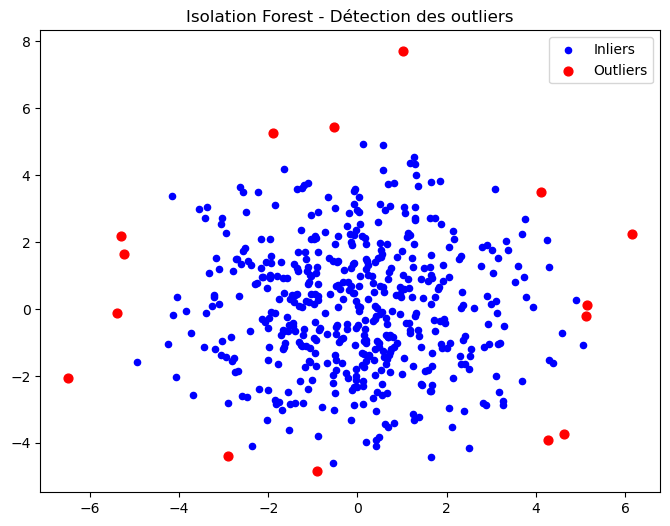

In [15]:
inliers = data[labels == 1]
outliers = data[labels == -1]

plt.figure(figsize=(8, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', label='Inliers', s=20)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers', s=40)
plt.legend()
plt.title("Isolation Forest - Détection des outliers")
plt.show()


In [16]:
scores = model.decision_function(data)

print("Scores d'anomalie (extraits) :")
print(scores[:5])


Scores d'anomalie (extraits) :
[-0.07161898  0.19113143  0.17257323  0.175754    0.07531773]


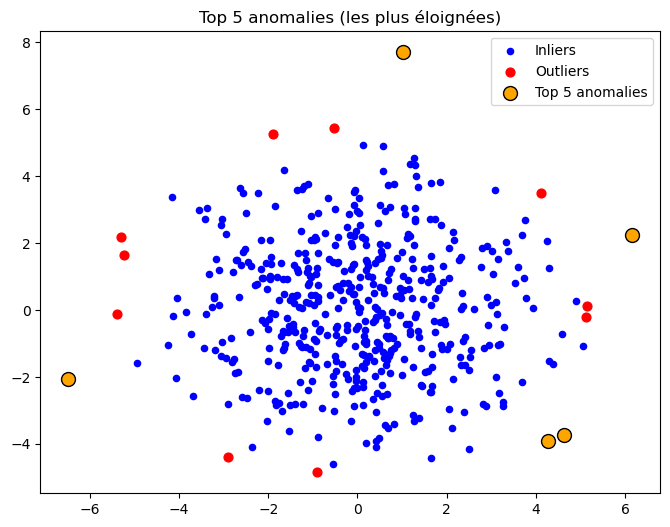

In [17]:
# Indices des 5 points avec les scores les plus bas
top_5_idx = np.argsort(scores)[:5]
top_5 = data[top_5_idx]

plt.figure(figsize=(8, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', label='Inliers', s=20)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers', s=40)
plt.scatter(top_5[:, 0], top_5[:, 1], c='orange', s=100, edgecolors='black', label='Top 5 anomalies')
plt.legend()
plt.title("Top 5 anomalies (les plus éloignées)")
plt.show()


# One-class SVM

1) Generate the following dataset with the help of numpy:


```python
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
np.random.seed(17)
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

plt.scatter([a[0] for a in X_train],[a[1] for a in X_train])
plt.scatter([a[0] for a in X_outliers],[a[1] for a in X_outliers])
plt.scatter([a[0] for a in X_test],[a[1] for a in X_test])
plt.legend(["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
```

2) Fit one-class SVM with default parameters, what is the default value of $\nu$?

3) Plot the decision boundary on the data, with the help of `plt.contourf()`. The plot should look something like this:
<img src="SVM-NuDefault.png">

4) What is the percentage of the correctly classified positive class in the train and test set with the default one-class SVM? What is the percentage of the correctly classified outliers? You can use the following for computation:

```python
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
```

5) What is the accuracy of the default one-class SVM?

6) Set the value of $\nu$ to $0.1$ and re-run one-class SVM. What do you notice when you plot the decision boundary now?

7) What is the percentage of the correctly classified positive class in the train and test set with one-class SVM having $\nu=0.1$? What is the percentage of the correctly classified outliers?

8) What is the accuracy of the one-class SVM with $\nu = 0.1$?

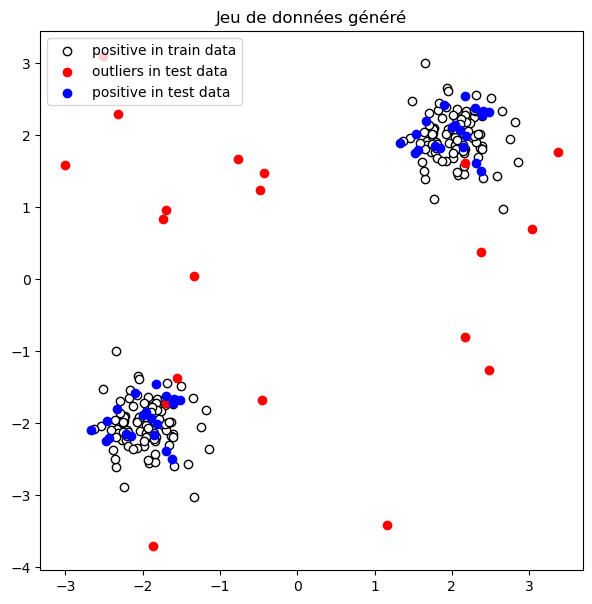

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Créer une grille pour afficher la frontière de décision plus tard
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Générer les données d'entraînement
np.random.seed(17)
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Générer des observations normales (test)
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Générer des outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Affichage
plt.figure(figsize=(7, 7))
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c='white', edgecolors='k')
plt.scatter([a[0] for a in X_outliers], [a[1] for a in X_outliers], c='red')
plt.scatter([a[0] for a in X_test], [a[1] for a in X_test], c='blue')
plt.legend(["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
plt.title("Jeu de données généré")
plt.show()


In [19]:
from sklearn.svm import OneClassSVM

# Entraîner le modèle sur les données normales uniquement
clf = OneClassSVM(kernel="rbf", gamma='scale')  
clf.fit(X_train)
# Valeur par défaut de nu (ν)
print("Valeur par défaut de ν :", clf.nu)


Valeur par défaut de ν : 0.5


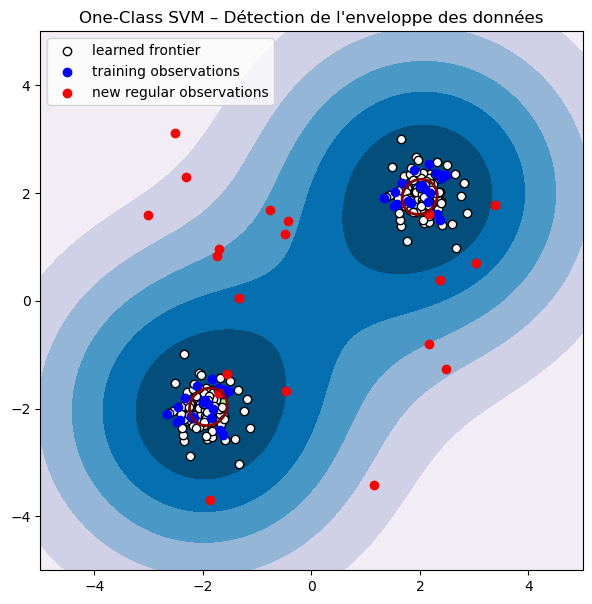

In [ ]:
# Prédire sur la grille
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage avec la frontière
plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palegreen')

# Affichage des points
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.legend(["learned frontier", "training observations", "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.title("One-Class SVM – Détection de l'enveloppe des données")
plt.show()


In [21]:
# Prédictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# Calcul du nombre d'erreurs
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Pourcentages de bonnes classifications
pct_correct_train = 100 * (1 - n_error_train / X_train.shape[0])
pct_correct_test = 100 * (1 - n_error_test / X_test.shape[0])
pct_correct_outliers = 100 * (1 - n_error_outliers / X_outliers.shape[0])

print(f"Pourcentage de la classe positive correctement classifiée sur le train: {pct_correct_train:.2f}%")
print(f"Pourcentage de la classe positive correctement classifiée sur le test: {pct_correct_test:.2f}%")
print(f"Pourcentage d'outliers correctement détectés: {pct_correct_outliers:.2f}%")


Pourcentage de la classe positive correctement classifiée sur le train: 50.00%
Pourcentage de la classe positive correctement classifiée sur le test: 35.00%
Pourcentage d'outliers correctement détectés: 95.00%


In [22]:
# Nombre total de points
total_points = X_train.shape[0] + X_test.shape[0] + X_outliers.shape[0]

# Nombre de points correctement classés
n_correct = (X_train.shape[0] - n_error_train) + (X_test.shape[0] - n_error_test) + (X_outliers.shape[0] - n_error_outliers)

accuracy_default = 100 * n_correct / total_points
print(f"Accuracy du modèle One-Class SVM par défaut : {accuracy_default:.2f}%")


Accuracy du modèle One-Class SVM par défaut : 51.15%


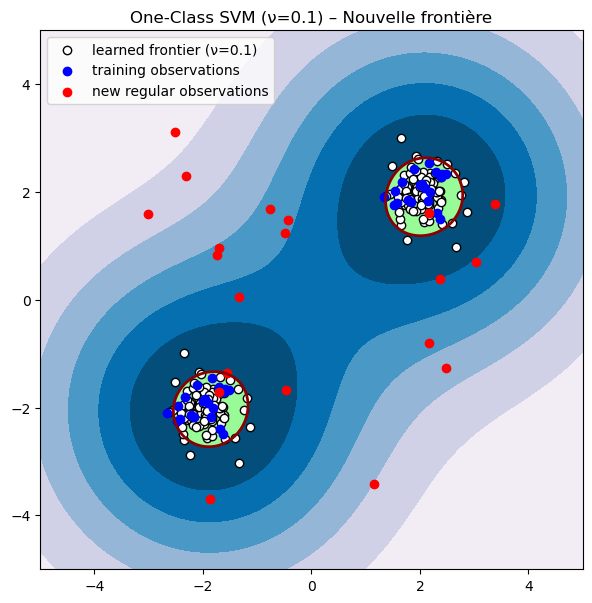

In [23]:
# Créer un nouveau modèle avec nu=0.1
clf_nu_01 = OneClassSVM(kernel="rbf", gamma='scale', nu=0.1)
clf_nu_01.fit(X_train)

# Prédire sur la grille
Z_nu_01 = clf_nu_01.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_nu_01 = Z_nu_01.reshape(xx.shape)

# Affichage de la nouvelle frontière
plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, Z_nu_01, levels=np.linspace(Z_nu_01.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z_nu_01, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z_nu_01, levels=[0, Z_nu_01.max()], colors='palegreen')

# Points
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.legend(["learned frontier (ν=0.1)", "training observations", "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.title("One-Class SVM (ν=0.1) – Nouvelle frontière")
plt.show()


In [24]:
# Prédictions
y_pred_train_nu01 = clf_nu_01.predict(X_train)
y_pred_test_nu01 = clf_nu_01.predict(X_test)
y_pred_outliers_nu01 = clf_nu_01.predict(X_outliers)

# Calcul du nombre d'erreurs
n_error_train_nu01 = y_pred_train_nu01[y_pred_train_nu01 == -1].size
n_error_test_nu01 = y_pred_test_nu01[y_pred_test_nu01 == -1].size
n_error_outliers_nu01 = y_pred_outliers_nu01[y_pred_outliers_nu01 == 1].size

# Pourcentages
pct_correct_train_nu01 = 100 * (1 - n_error_train_nu01 / X_train.shape[0])
pct_correct_test_nu01 = 100 * (1 - n_error_test_nu01 / X_test.shape[0])
pct_correct_outliers_nu01 = 100 * (1 - n_error_outliers_nu01 / X_outliers.shape[0])

print(f"Pourcentage (ν=0.1) de la classe positive correctement classifiée sur le train: {pct_correct_train_nu01:.2f}%")
print(f"Pourcentage (ν=0.1) de la classe positive correctement classifiée sur le test: {pct_correct_test_nu01:.2f}%")
print(f"Pourcentage (ν=0.1) d'outliers correctement détectés: {pct_correct_outliers_nu01:.2f}%")


Pourcentage (ν=0.1) de la classe positive correctement classifiée sur le train: 90.50%
Pourcentage (ν=0.1) de la classe positive correctement classifiée sur le test: 95.00%
Pourcentage (ν=0.1) d'outliers correctement détectés: 90.00%


In [25]:
# Nombre total de points
total_points_nu01 = X_train.shape[0] + X_test.shape[0] + X_outliers.shape[0]

# Nombre de points correctement classés
n_correct_nu01 = (X_train.shape[0] - n_error_train_nu01) + (X_test.shape[0] - n_error_test_nu01) + (X_outliers.shape[0] - n_error_outliers_nu01)

accuracy_nu01 = 100 * n_correct_nu01 / total_points_nu01
print(f"Accuracy du modèle One-Class SVM avec ν=0.1 : {accuracy_nu01:.2f}%")


Accuracy du modèle One-Class SVM avec ν=0.1 : 91.15%
